In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import os

In [2]:
patient_id = 94628
folder = '/home/mattia/Desktop/final_thesis/01_dataset_creation/nnUNet_Raw'

ax = sitk.ReadImage(os.path.join(folder, f'Dataset001_axial/imagesTr/{patient_id}_0000.nii'))
cor = sitk.ReadImage(os.path.join(folder, f'Dataset002_coronal/imagesTr/{patient_id}_0000.nii'))
sag = sitk.ReadImage(os.path.join(folder, f'Dataset003_sagittal/imagesTr/{patient_id}_0000.nii'))


In [3]:
ax_np = sitk.GetArrayFromImage(ax)
cor_np = sitk.GetArrayFromImage(cor)
sag_np = sitk.GetArrayFromImage(sag)


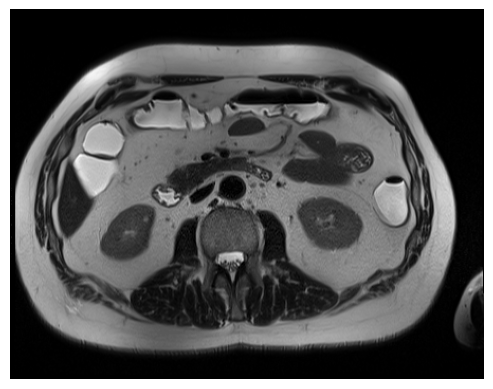

In [4]:
plt.imshow(ax_np[27,::-1,:], cmap='gray')
plt.axis('off')
plt.savefig('axial_ax.pdf', bbox_inches='tight', pad_inches=0)

In [50]:
def sitk_show(img, title=None):

    nda = sitk.GetArrayFromImage(img)
    
    spacing = img.GetSpacing()
    ratio = spacing[1] / spacing[0]
    
    plt.imshow(nda, cmap='gray', aspect=ratio)
    plt.axis('off')
    plt.savefig(f'{title}.pdf', bbox_inches='tight', pad_inches=0)

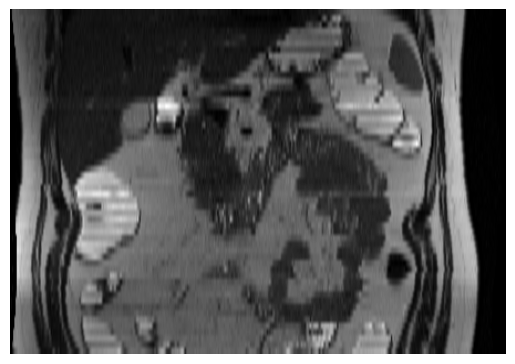

In [51]:
sitk_show(ax[:,200,::-1], 'axial_cor.pdf')

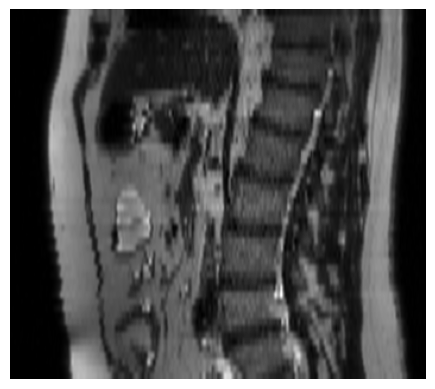

In [52]:
sitk_show(ax[195,::-1,::-1], 'axial_sag.pdf')

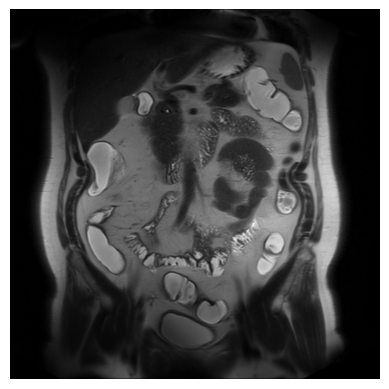

In [20]:
plt.imshow(cor_np[20,::-1,:], cmap='gray')
plt.axis('off')
plt.savefig('coronal.pdf', bbox_inches='tight', pad_inches=0)

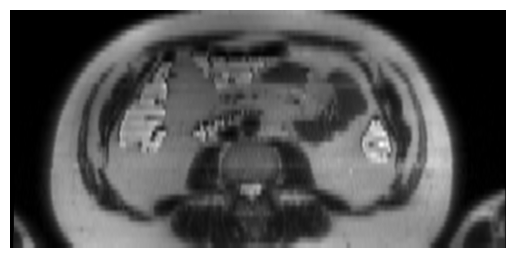

In [64]:
sitk_show(cor[:,500,:], 'coronal_ax.pdf')

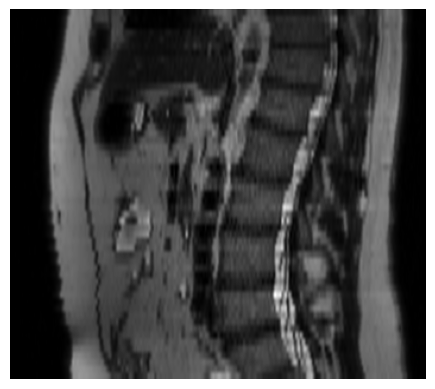

In [66]:
sitk_show(ax[200,::-1,::-1], 'coronal_sag.pdf')

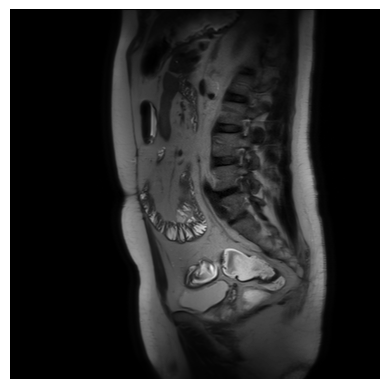

In [21]:
plt.imshow(sag_np[32,::-1,:], cmap='gray')
plt.axis('off')
plt.savefig('sagittal.pdf', bbox_inches='tight', pad_inches=0)

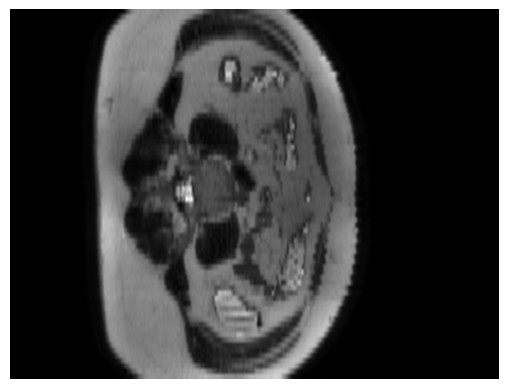

In [69]:
sitk_show(sag[::-1,500,::-1], 'sagittal_ax.pdf')

In [28]:
patient_verio = 928807
patient_skyra = '928807_1'

ax_verio = sitk.ReadImage(os.path.join(folder, f'Dataset001_axial/imagesTr/{patient_verio}_0000.nii'))
ax_skyra = sitk.ReadImage(os.path.join(folder, f'Dataset001_axial/imagesTr/{patient_skyra}_0000.nii'))

ax_verio = sitk.GetArrayFromImage(ax_verio)
ax_skyra = sitk.GetArrayFromImage(ax_skyra)

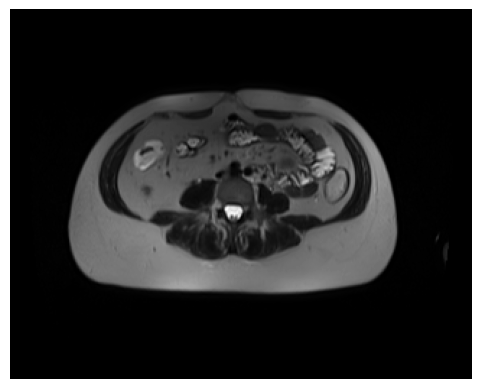

In [38]:
plt.imshow(ax_verio[49,::-1,:], cmap='gray')
plt.axis('off')
plt.savefig('verio.pdf', bbox_inches='tight', pad_inches=0)

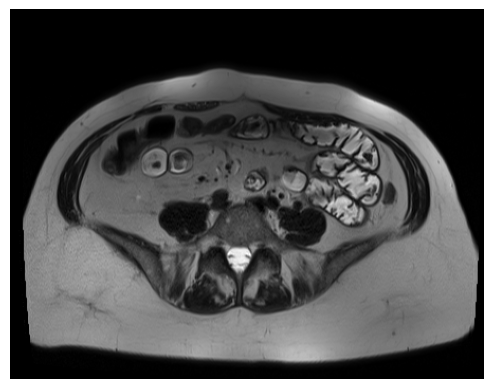

In [37]:
plt.imshow(ax_skyra[47,::-1,:], cmap='gray')
plt.axis('off')
plt.savefig('skyra.pdf', bbox_inches='tight', pad_inches=0)

In [ ]:
from skimage import io, color, segmentation


In [201]:
def img_and_label(ID, view, slice):
    
    folder = '/home/mattia/Desktop/final_thesis/01_dataset_creation/nnUNet_Raw'
    
    if view == 'axial':
        path = os.path.join(folder, 'Dataset001_axial')
    elif view == 'coronal':
        path = os.path.join(folder, 'Dataset002_coronal')
    else:
        path = os.path.join(folder, 'Dataset003_sagittal')
    

    image = sitk.ReadImage(os.path.join(path, f'imagesTr/{patient_id}_0000.nii'))
    mask = sitk.ReadImage(os.path.join(path, f'labelsTr/{patient_id}.nii'))
    
    image = sitk.GetArrayFromImage(image)
    mask = sitk.GetArrayFromImage(mask)

    image = image[slice,::-1,:]
    mask = mask[slice,::-1,:]
    
    image = (image - image.min()) / (image.max() - image.min())
    
    fill_color = [x/255 for x in (128,174,128)]
    border_color = [x/255 for x in (144,238,144)]
    
    image_fill = color.label2rgb(mask, image, colors = [fill_color], alpha = 0.3, bg_label=0)
    image_border = segmentation.mark_boundaries(image_fill, mask, color=[border_color])
    
    plt.imshow(image_border)
    #plt.axis('off')
    #plt.savefig(f'{view}_with_label.pdf', bbox_inches='tight', pad_inches=0)
    
    return image_border

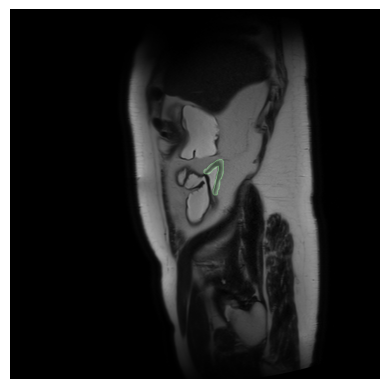

In [132]:
test = img_and_label(94628, 'sagittal', 59)

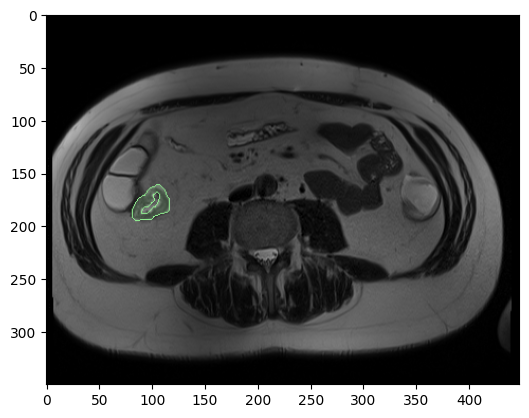

In [202]:
test = img_and_label(94628, 'axial', 16)

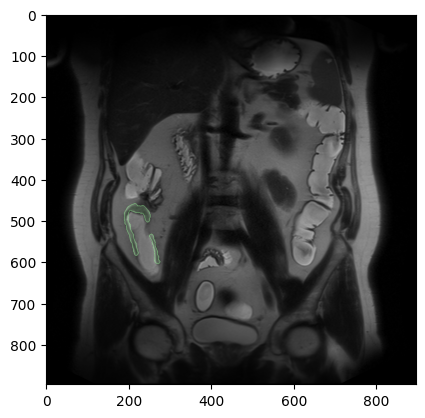

In [215]:
test = img_and_label(94628, 'coronal', 24)

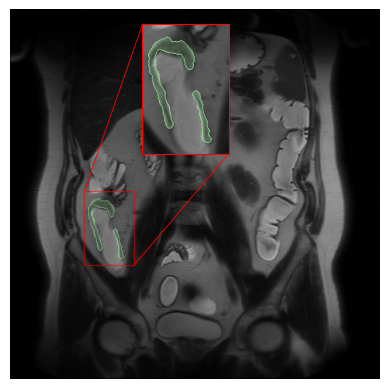

In [227]:
import matplotlib.patches as mpatches


fig, ax = plt.subplots()
ax.imshow(test)

xlim = (180, 300)
ylim = (620, 440)

axins = ax.inset_axes([0.3, 0.61, 0.35, 0.35],
                      xlim=xlim,
                      ylim=ylim,
                      xticklabels=[],
                      yticklabels=[],
                     )

axins.tick_params(left = False, bottom = False)

axins.spines['bottom'].set_color('red')
axins.spines['top'].set_color('red') 
axins.spines['right'].set_color('red')
axins.spines['left'].set_color('red')

axins.imshow(test)

rectpatch, connects = ax.indicate_inset_zoom(axins, edgecolor="red")

for con in connects:
    con.set_visible(False)

xyA = (1,0) # coordinate zoomed box
xyB = (xlim[1], ylim[0]) # coordinate original box

connect = mpatches.ConnectionPatch(xyA, xyB,
                                   'axes fraction',
                                   'data',
                                   axesA=axins,
                                   axesB=ax,
                                   arrowstyle="-",
                                   color='red',
                                   linewidth = 0.6
                                   )

ax.add_patch(connect)

xyA = (0,1) # coordinate zoomed box
xyB = (xlim[0], ylim[1]) # coordinate original box

connect = mpatches.ConnectionPatch(xyA, xyB,
                                   'axes fraction',
                                   'data',
                                   axesA=axins,
                                   axesB=ax,
                                   arrowstyle="-",
                                   color='red',
                                   linewidth = 0.6
                                   )
ax.add_patch(connect)
plt.axis('off')
plt.savefig('coronal_with_label.pdf', bbox_inches='tight', pad_inches=0)